In [2]:
import pandas as pd

In [3]:
df1 = pd.read_excel("Aracaju.xlsx") 
df2 = pd.read_excel("Fortaleza.xlsx") 
df3 = pd.read_excel("Natal.xlsx") 
df4 = pd.read_excel("Recife.xlsx") 
df5 = pd.read_excel("Salvador.xlsx") 

In [4]:
df5.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Salvador,2018-01-01,31.06,1037,3
1,Salvador,2018-01-01,19.02,1034,3
2,Salvador,2019-02-10,173.59,1035,3
3,Salvador,2019-02-10,176.34,1037,3
4,Salvador,2019-02-14,19.47,1037,3


In [5]:
#juntanto todos os arquivos
df = pd.concat([df1,df2,df3,df4,df5])

In [6]:
#Exibindo as 5 primeiras linhas 
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [7]:
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [8]:
#verificando o tipo de dados de cada coluna
df.dtypes 

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [9]:
df.sample(3)

,Cidade,Data,Vendas,LojaID,Qtde
78,Fortaleza,2019-01-01,37.66,1005,2
47,Salvador,2019-01-01,190.03,1036,2
87,Aracaju,2018-01-01,116.71,1520,4


In [10]:
#Alterando o tipo de dado da coluna LojaID
df["LojaID"] = df["LojaID"].astype("object")

In [11]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [12]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [13]:
#consultando linhas com valores faltantes
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [14]:
#substituindo os valores nulos pela média 
df["Vendas"].fillna(df["Vendas"].mean(), inplace=True)

In [15]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [16]:
df["Vendas"].mean()

122.61180089485458

In [17]:
#substituindo os valores nulos por zero
df["Vendas"].fillna(0, inplace=True)

In [18]:
#Apagando as linhas com valores nulos
df.dropna(inplace=True)

In [19]:
#Apagando as linhas com valores nulos com base apenas em 1 coluna
df.dropna(subset=["Vendas"], inplace=True)

In [20]:
#Removendo linhas que estejam com valores faltantes em todas as colunas
df.dropna(how="all", inplace=True)

In [21]:
df.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde
13,Fortaleza,2019-02-12,118.58,1003,4
144,Natal,2019-01-02,23.38,1034,1
69,Aracaju,2018-01-01,15.81,1523,1
108,Aracaju,2018-01-01,31.94,1520,8
66,Aracaju,2018-01-01,76.59,1523,4
6,Recife,2019-01-01,16.27,981,6
28,Fortaleza,2019-01-01,34.88,1004,3
88,Natal,2019-01-02,31.20,1036,1
170,Salvador,2019-01-02,9.26,1035,3
110,Fortaleza,2019-03-02,51.98,983,6


In [22]:
#CRIANDO NOVAS COLUNAS

In [23]:
#Criando a coluna receitas
df["receitas"] = df["Vendas"].mul(df["Qtde"])

In [24]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,receitas
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [25]:
#caso so tenha a receita mas não tenha a coluna quantidade 
df["Receita/Vendas"] = df["receitas"] / df["Vendas"]

In [26]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,receitas,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [27]:
#retornando a maior receita
df["receitas"].max()

3544.0

In [28]:
df["receitas"].min()

3.34

In [29]:
#nlargest visualizar qual sao as receitas max e min a cima
df.nlargest(3, "receitas")

,Cidade,Data,Vendas,LojaID,Qtde,receitas,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [30]:
  df.nsmallest(3, "receitas")

,Cidade,Data,Vendas,LojaID,Qtde,receitas,Receita/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [31]:
#agrupamento por cidade retornar a soma da receita
df.groupby("Cidade")["receitas"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: receitas, dtype: float64

In [32]:
#colocar em ordem o conjunto de dados
df.sort_values("receitas", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,receitas,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


In [33]:
#TRABALHANDO COM DATAS

In [34]:
#transformando a coluna de datas em tipos inteiros 
df["Data"] = df["Data"].astype("int64")

In [35]:
#verificando o tipo de dados de cada coluna
df.dtypes

Cidade             object
Data                int64
Vendas            float64
LojaID             object
Qtde                int64
receitas          float64
Receita/Vendas    float64
dtype: object

In [36]:
#transformando coluna de data em data
df["Data"] = pd.to_datetime(df["Data"])

In [37]:
df.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                    object
Qtde                       int64
receitas                 float64
Receita/Vendas           float64
dtype: object

In [38]:
#Saber a receita por ano, analisar se a receita aumentou ou diminuiu
df.groupby(df["Data"].dt.year)["receitas"].sum()

Data
2018    118176.53
2019    228246.45
Name: receitas, dtype: float64

In [39]:
#criar uma nova coluna com o ano
df["Ano_vendas"] = df["Data"].dt.year

In [40]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,receitas,Receita/Vendas,Ano_vendas
109,Aracaju,2018-01-01,51.64,1523,5,258.20,5.0,2018
236,Natal,2019-01-03,126.29,1035,3,378.87,3.0,2019
127,Fortaleza,2019-03-02,39.56,982,8,316.48,8.0,2019
113,Salvador,2019-03-02,18.90,1034,3,56.70,3.0,2019
137,Fortaleza,2019-03-02,51.99,983,3,155.97,3.0,2019


In [41]:
#Extraindo o mês e o dia 
df["mes_vendas"], df["dia_vendas"] = (df["Data"].dt.month, df["Data"].dt.day)

In [42]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,receitas,Receita/Vendas,Ano_vendas,mes_vendas,dia_vendas
227,Salvador,2019-01-02,14.70,1035,1,14.70,1.0,2019,1,2
225,Natal,2019-01-02,36.23,1035,1,36.23,1.0,2019,1,2
108,Salvador,2019-03-02,11.72,1037,1,11.72,1.0,2019,3,2
96,Aracaju,2018-01-01,85.92,1521,2,171.84,2.0,2018,1,1
60,Fortaleza,2019-01-01,182.14,1002,4,728.56,4.0,2019,1,1


In [43]:
#retornando a data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [44]:
#calculando a diferença de dias
df["diferença_dias"] = df["Data"] - df["Data"].min()

In [45]:
df.sample(6)

,Cidade,Data,Vendas,LojaID,Qtde,receitas,Receita/Vendas,Ano_vendas,mes_vendas,dia_vendas,diferença_dias
46,Natal,2019-03-26,753.00,853,2,1506.00,2.0,2019,3,26,449 days
123,Aracaju,2018-01-01,115.19,1523,6,691.14,6.0,2018,1,1,0 days
4,Natal,2019-03-09,699.00,853,3,2097.00,3.0,2019,3,9,432 days
76,Aracaju,2018-01-01,33.51,1523,4,134.04,4.0,2018,1,1,0 days
125,Recife,2019-03-02,37.60,983,4,150.40,4.0,2019,3,2,425 days
22,Aracaju,2018-01-01,150.94,1522,1,150.94,1.0,2018,1,1,0 days


In [46]:
#criando a coluna de trimestre
df["trimestre_vendas"] = df["Data"].dt.quarter

In [47]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,receitas,Receita/Vendas,Ano_vendas,mes_vendas,dia_vendas,diferença_dias,trimestre_vendas
39,Recife,2019-01-01,143.58,981,3,430.74,3.0,2019,1,1,365 days,1
9,Aracaju,2019-01-01,149.36,1523,3,448.08,3.0,2019,1,1,365 days,1
75,Recife,2019-01-01,170.29,981,8,1362.32,8.0,2019,1,1,365 days,1
30,Salvador,2019-01-01,47.96,1034,2,95.92,2.0,2019,1,1,365 days,1
70,Fortaleza,2019-01-01,79.57,1002,5,397.85,5.0,2019,1,1,365 days,1


In [48]:
#filtrando as vendas de 2019 do mes de março
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [49]:
vendas_marco_19

,Cidade,Data,Vendas,LojaID,Qtde,receitas,Receita/Vendas,Ano_vendas,mes_vendas,dia_vendas,diferença_dias,trimestre_vendas
108,Fortaleza,2019-03-02,152.89,981,4,611.56,4.0,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,6.0,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,6.0,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,3.0,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,1.0,2019,3,2,425 days,1
...,...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,3.0,2019,3,2,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,3.0,2019,3,2,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,1.0,2019,3,2,425 days,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2.0,2019,3,2,425 days,1


In [50]:
vendas_marco_19.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde,receitas,Receita/Vendas,Ano_vendas,mes_vendas,dia_vendas,diferença_dias,trimestre_vendas
71,Natal,2019-03-20,840.00,854,3,2520.00,3.0,2019,3,20,443 days,1
19,Natal,2019-03-31,282.00,854,2,564.00,2.0,2019,3,31,454 days,1
82,Natal,2019-03-07,868.00,854,3,2604.00,3.0,2019,3,7,430 days,1
123,Fortaleza,2019-03-02,20.22,981,6,121.32,6.0,2019,3,2,425 days,1
131,Fortaleza,2019-03-02,139.07,982,6,834.42,6.0,2019,3,2,425 days,1
45,Natal,2019-03-11,431.00,852,3,1293.00,3.0,2019,3,11,434 days,1
123,Salvador,2019-03-02,127.45,1036,3,382.35,3.0,2019,3,2,425 days,1
115,Salvador,2019-03-02,202.33,1035,2,404.66,2.0,2019,3,2,425 days,1
110,Salvador,2019-03-02,185.93,1036,3,557.79,3.0,2019,3,2,425 days,1
115,Fortaleza,2019-03-02,12.23,981,3,36.69,3.0,2019,3,2,425 days,1


In [51]:
#visualizando Dados

In [52]:
df["LojaID"].value_counts(ascending=False)

LojaID
1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: count, dtype: int64

<Axes: xlabel='LojaID'>

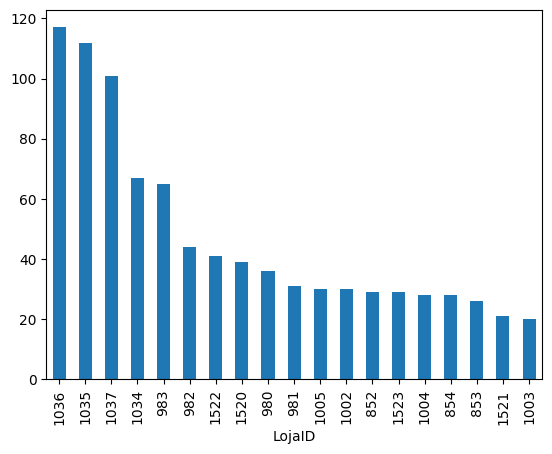

In [53]:
#Grafico de barras
df["LojaID"].value_counts(ascending=False).plot.bar()

<Axes: ylabel='LojaID'>

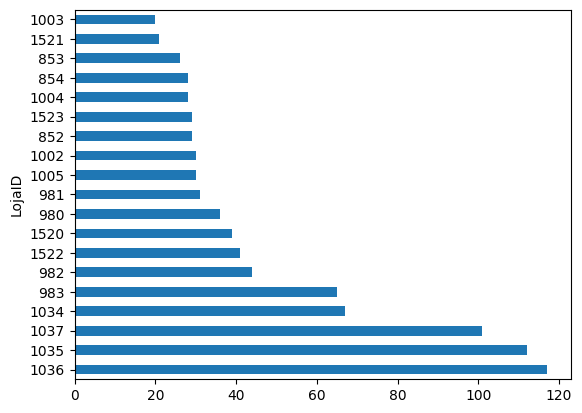

In [54]:
#Grafico de barras horizontais
df["LojaID"].value_counts(ascending=False).plot.barh()

<Axes: ylabel='LojaID'>

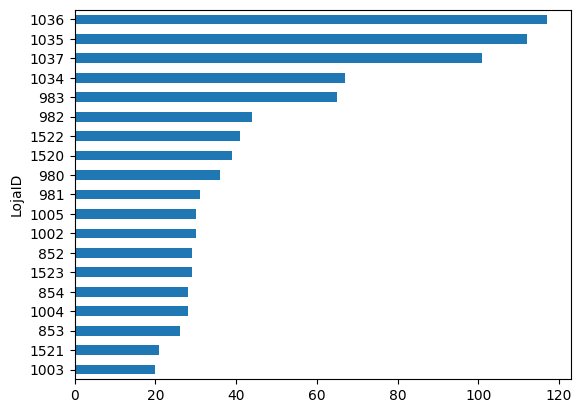

In [55]:
#Grafico de barras horizontais
df["LojaID"].value_counts(ascending=True).plot.barh()

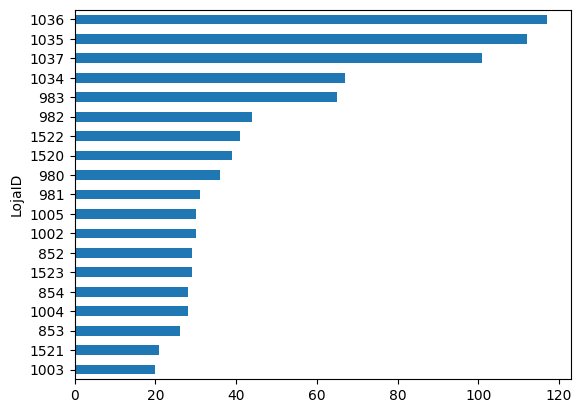

In [56]:
#para não mostrar a linha em cima do grafico use ponto e virgula
df["LojaID"].value_counts(ascending=True).plot.barh();

<Axes: ylabel='receitas'>

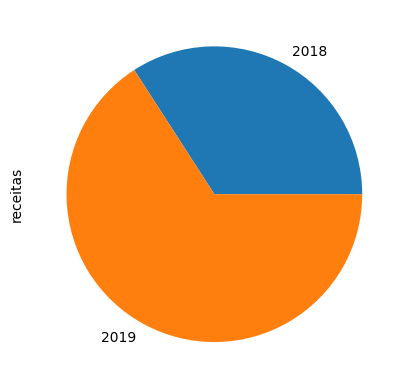

In [57]:
#Grafico pizza 
df.groupby(df["Data"].dt.year)["receitas"].sum().plot.pie()

In [58]:
#total de vendas por cidades 
df["Cidade"].value_counts()

Cidade
Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: count, dtype: int64

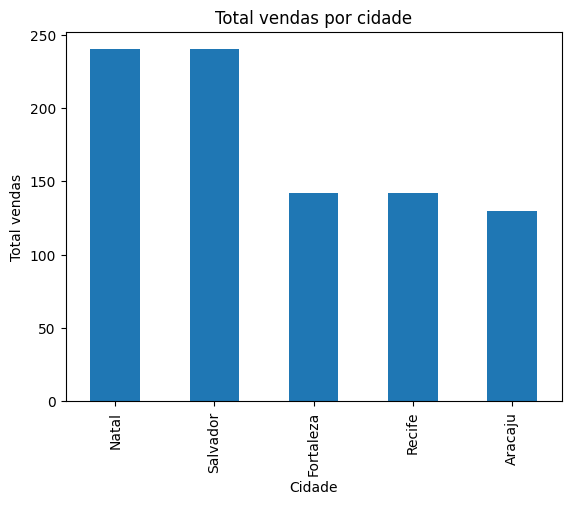

In [59]:
#Adicionar um titulo e alterar o nome dos eixos
import matplotlib.pyplot as plt 
df["Cidade"].value_counts().plot.bar(title="Total vendas por cidade")
plt.xlabel("Cidade")
plt.ylabel("Total vendas");

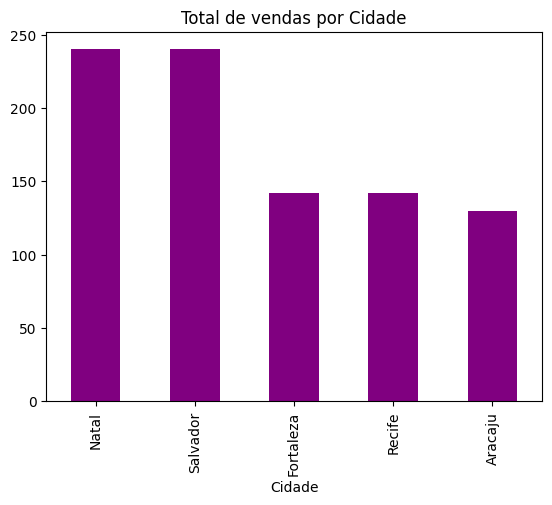

In [60]:
#alterando a cor
df["Cidade"].value_counts().plot.bar(title="Total de vendas por Cidade", color="purple");

In [61]:
#Alterando o estilo
plt.style.use("ggplot")

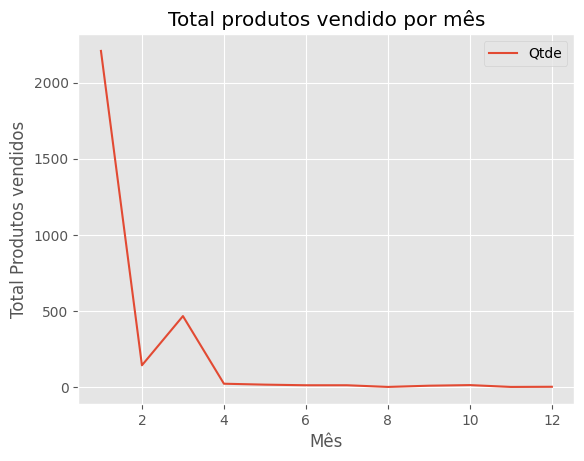

In [62]:
df.groupby(df["mes_vendas"])["Qtde"].sum().plot(title = "Total produtos vendido por mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos vendidos");
plt.legend();

In [63]:
df.groupby(df["mes_vendas"])["Qtde"].sum()

mes_vendas
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [64]:
#Selecionando apenas as vendas de 2019
df_2019 = df[df["Ano_vendas"] == 2019]

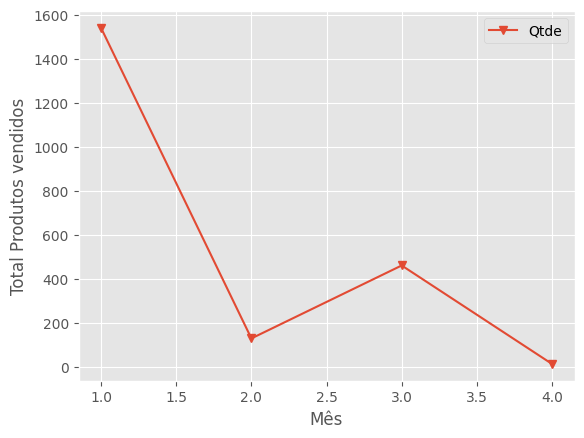

In [65]:
#Total produtos vendidos por mês
df_2019.groupby(df_2019["mes_vendas"])["Qtde"].sum().plot(marker = "v")
plt.xlabel("Mês")
plt.ylabel("Total Produtos vendidos");
plt.legend();

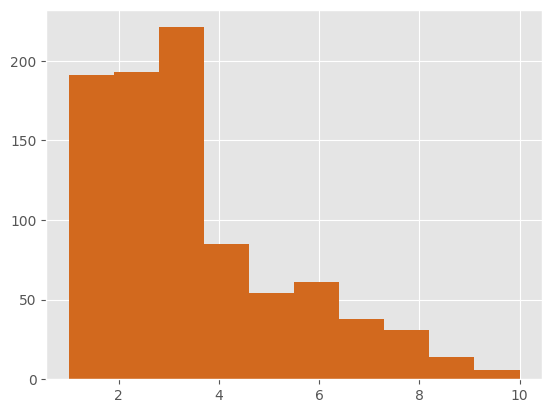

In [66]:
#Histograma
plt.hist(df["Qtde"], color="chocolate");

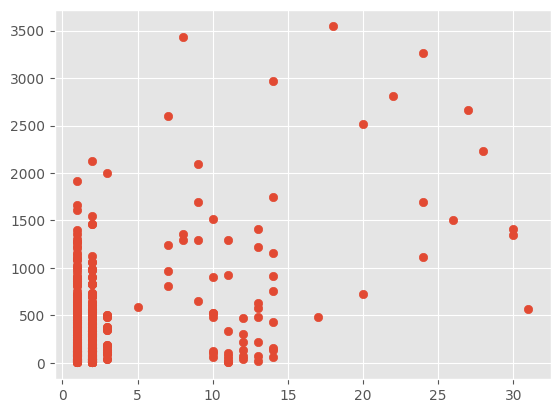

In [68]:
plt.scatter(x=df_2019["dia_vendas"], y = df_2019["receitas"]);

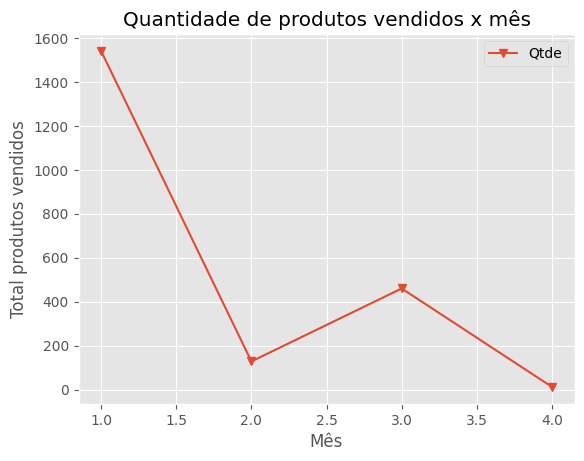

In [73]:
#Salvando em png
df_2019.groupby(df_2019["mes_vendas"])["Qtde"].sum().plot(marker = "v")
plt.title("Quantidade de produtos vendidos x mês")
plt.xlabel("Mês")
plt.ylabel("Total produtos vendidos");
plt.legend()
plt.savefig("grafico QTDE x MES.png")